# Case study: How Can a Wellness Technology Company Play It Smart?

# Introduction

Imagine you are working as a junior data analyst for Bellabeat, a high-tech manufacturer of health-focused products for women, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the
data analysis process: ask, prepare, process, analyze, share, and act. 

Title: Bellabeat Case Study

Author: Vincent Le
Date: 11 April 2022

# STEP 1: ASK

### 1.0 Background

Bellabeat is a successful and high-tech manufacturer of health-focused products for women since 2013. 

With the vision of becomming a larger player in the global smart device market, Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data (Fitbit fitness tracker usage data) could help unlock new growth opportunities for the company.

Current marketing strategy:

Bellabeat invests in Traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively.

The company invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and displays ads on the Google Display Network to support campaigns around key marketing dates.

### 1.1 Business Task:

Analyze Fitbit Fitness Tracker Data to gain insights into how consumers are using their smart devices and discover trends and insights for Bella Marketing Strategy.

### 1.2 Business Objective:

1. What are the trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### 1.3 Deliverables:

1. A clear summary of the business task
2. A description of all data sources usage
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting vizualizations and key findings
6. Your top high level content recommendations based on you analysis

### 1.4 Key Stakeholders

1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

# STEP 2: PREPARE

### 2.1 About the Data Source:

1. The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files
2. This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016
3. Data set contains personal fitness tracker from 33 fitbit users
4. The data consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

### 2.2 Limitations
 
1. The data is not a perfect representation of all Fitbit users. Only 33 users took part in the survey over the span of two months
2. Roughly a quarter of the participants didn’t record any sleep data. Three quarters of participants didn’t record weight data.
3. Data is quite old. It was collected from year 2016 so Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant
3. The data comes from a third-party source with no way to examine credibility or potential biases.

### 2.3 Is Data ROCCC?

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

1. Reliable - LOW - Not reliable as it only has 33 respondents
2. Original - LOW - Third-party source (Amazon Mechnical Turk)
3. Comprehensive - MED - Parameters match most of Bellabeat products' parameters
4. Current - LOW - The data is old
4. Cited - LOW - Third-party, unknown

Overall, the dataset is considered bad quality data and it is not recommended to produce business recommendations based on this data.

# STEP 3: PROCESS

I am using Python to Prepare and Process data.

### 3.1 Preparing the Environment

Loading libraries:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### 3.2 Importing Datasets

Loading datasets:

In [3]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
hourly_calories = pd.read_csv("hourlyCalories_merged.csv")

### 3.3 Data Cleaning & Manipulation

#### Getting an overview of the data

Let's start by taking a first look into our datasets:

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [6]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [8]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


#### Checking the datatypes in each dataset:

In [9]:
daily_activity.dtypes

#notice that ActivityDate is in Object type

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
weight.dtypes

#Date is in Object type

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [11]:
sleep_day.dtypes

#Sleepday is in Object type

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [12]:
hourly_calories.dtypes

#Activityhour is in Object type

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [13]:
hourly_steps.dtypes

#Activityhour is in Object type

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

#### Summary Statistics

The next step involves learning more about some of our datasets' statistics, so we can better understand the datasets and their content.

1. How many unique participants are there in each dataframe?

In [14]:
daily_activity.Id.nunique()

33

In [15]:
weight.Id.nunique()

8

In [16]:
sleep_day.Id.nunique()

24

In [17]:
hourly_calories.Id.nunique()

33

In [18]:
hourly_steps.Id.nunique()

33

By looking at the results above, we can conclude that not all 33 participants have logged their weight and sleep information to the app.

The weight dataset only contains from 8 users could be a problem when it comes to making recommendations for the general public. Those users may not represent for the whole population, which could lead to biased results. For this reason, I will not include this dataset in my analysis.

2. How many rows and columns are there in each dataframe?

In [19]:
daily_activity.shape

(940, 15)

In [20]:
sleep_day.shape

(413, 5)

In [21]:
hourly_calories.shape

(22099, 3)

In [22]:
hourly_steps.shape

(22099, 3)

In [23]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [24]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [25]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [26]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


#### Cleaning data

Now, it is time to make sure our data is clean and tidy.

Checking for empty cells:

In [27]:
daily_activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [28]:
sleep_day.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

In [29]:
hourly_calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

In [30]:
hourly_steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

Checking for duplicate values:

In [31]:
daily_activity.duplicated().sum()

0

In [32]:
sleep_day.duplicated().sum()

#we found 3 duplicated values

3

In [33]:
hourly_calories.duplicated().sum()

0

In [34]:
hourly_steps.duplicated().sum()

0

In [35]:
sleep_day_new = sleep_day.drop_duplicates()

In [36]:
sleep_day_new.duplicated().sum()

#checking again for duplicate values

0

From the above observation, we can note that

1. There is no Null/Missing values
2. 3 duplicate values found, already removed it
3. Date in all tables is wrongly classified as object dtype and has to be converted to datetime dtype.

#### Data Transformation

Renaming the date column

The date column is named differently across the datasets. Let's rename them to make it easier for when we merge the datasets later.

In [37]:
daily_activity = daily_activity.rename(columns={'ActivityDate': 'Date'})
sleep_day_new = sleep_day_new.rename(columns={'SleepDay': 'Date'})
hourly_calories = hourly_calories.rename(columns={'ActivityHour': 'Time'})
hourly_steps = hourly_steps.rename(columns={'ActivityHour': 'Time'})

Converting the datatype of Date columns in all tables

In [39]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])
sleep_day_new['Date'] = pd.to_datetime(sleep_day_new['Date'])
hourly_calories['Time'] = pd.to_datetime(hourly_calories['Time'])
hourly_steps['Time'] = pd.to_datetime(hourly_steps['Time'])

Creating day of week column to make us easier analyze our data and vizualize it

In [41]:
daily_activity['DayOfWeek'] = daily_activity['Date'].dt.day_name()
hourly_steps['DayOfWeek'] = hourly_steps['Time'].dt.day_name()

Now, it is the time for merging our datasets

In [45]:
data_merged = pd.merge(daily_activity, sleep_day_new, on='Date')

data_merged = data_merged.rename(columns={'Id_x': 'Id_Activity', 'Id_y': 'Id_Sleep'})

data_merged.head()

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_Sleep,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546
3,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,3977333714,1,274,469
4,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,4020332650,1,501,541


In [47]:
hourly_merged = pd.merge(hourly_calories, hourly_steps, on=['Time', 'Id'])
hourly_merged.head()

,Id,Time,Calories,StepTotal,DayOfWeek
0,1503960366,2016-04-12 00:00:00,81,373,Tuesday
1,1503960366,2016-04-12 01:00:00,61,160,Tuesday
2,1503960366,2016-04-12 02:00:00,59,151,Tuesday
3,1503960366,2016-04-12 03:00:00,47,0,Tuesday
4,1503960366,2016-04-12 04:00:00,48,0,Tuesday


In [49]:
hourly_merged['Time'].max() - hourly_merged['Time'].min()

#This data was recorded within 30 days

Timedelta('30 days 15:00:00')

# STEP 4: ANALYZE

### 4.1 Activity Data

#### Analyzing the average of total steps and calories


In [51]:
data_merged.agg(
{'TotalSteps': ['mean', 'min', 'max'],
 'Calories': ['mean', 'min', 'max'],
})

,TotalSteps,Calories
mean,7675.418508,2315.240686
min,0.000000,0.000000
max,36019.000000,4900.000000


We can see that the average of total daily steps of the users is about 7675 steps. According to a research conducted in 2011 by BMC/BioMed Central showed that taking 10,000 steps per day is a reasonable target for healthy adults, helping reduce certain health conditions such as high blood pressure and heart disease.

The following categories can be considerable:

   1. Inactive: Less than 5,000 steps/day
   2. Average:  Between 7,500 and 9,999 steps/day
   3. Very Active: More than 12,500 steps/day
   
Given the information above, we can conclude that our users fall into the Average category.   

#### Analyzing the average total steps by Day of the Week

In [58]:
from pandas.api.types import CategoricalDtype

Temp = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Temp_type = CategoricalDtype(categories=Temp, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(Temp_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(Temp)
df_weekday.filter(['TotalSteps'])

,TotalSteps
DayOfWeek,
Monday,7750.912917
Tuesday,8115.021662
Wednesday,7593.504995
Thursday,7635.667011
Friday,7449.285319
Saturday,8176.288136
Sunday,6943.197226


#### Analyzing the most active time of day

In [62]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean()

Time
0      42.188437
1      23.102894
2      17.110397
3       6.426581
4      12.699571
5      43.869099
6     178.508056
7     306.049409
8     427.544576
9     433.301826
10    481.665231
11    456.886731
12    548.642082
13    537.698154
14    540.513572
15    406.319126
16    496.845645
17    550.232892
18    599.169978
19    583.390728
20    353.905077
21    308.138122
22    237.987832
23    122.132890
Name: StepTotal, dtype: float64

#### Analyzing the time of day users burn the most calories

In [63]:
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean()

Time
0      71.805139
1      70.165059
2      69.186495
3      67.538049
4      68.261803
5      81.708155
6      86.996778
7      94.477981
8     103.337272
9     106.142857
10    110.460710
11    109.806904
12    117.197397
13    115.309446
14    115.732899
15    106.637158
16    113.327453
17    122.752759
18    123.492274
19    121.484547
20    102.357616
21     96.056354
22     88.265487
23     77.593577
Name: Calories, dtype: float64

#### Analyzing different catergories of activity

In [65]:
daily_activity.agg(
{'VeryActiveMinutes': ['mean', 'min', 'max'],
 'FairlyActiveMinutes': ['mean', 'min', 'max'],
 'LightlyActiveMinutes': ['mean', 'min', 'max'],
 'SedentaryMinutes': ['mean', 'min', 'max'],
})

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,21.164894,13.564894,192.812766,991.210638
min,0.000000,0.000000,0.000000,0.000000
max,210.000000,143.000000,518.000000,1440.000000


Most of the time, users spend their time with Sendentary with 16.5 hours. They spend about 3.2 hours of their day being Lightly Active, 14 minutes being Fairly Active, and 21 minutes being Very Active.

### Sleep Data

#### Analyzing the Average of Total Minutes Asleep and Total Time in Bed


In [69]:
sleep_day_new.agg(
{'TotalMinutesAsleep': ['mean', 'min', 'max'],
 'TotalTimeInBed': ['mean', 'min', 'max'],   
})

,TotalMinutesAsleep,TotalTimeInBed
mean,419.173171,458.482927
min,58.000000,61.000000
max,796.000000,961.000000


According to the [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html), an adult between 18-60 years old should get 7 or more hours of sleep per night. Based in this data showing, we can see that users have good sleeping habits with average sleep around 7 hours.

#### Analyzing the Average minutes asleep by day of the week

In [74]:
Temp = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Temp_type = CategoricalDtype(categories=Temp, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(Temp_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean()
df_weekday.filter(['TotalMinutesAsleep'])

,TotalMinutesAsleep
DayOfWeek,
Monday,418.947750
Tuesday,404.815617
Wednesday,434.566434
Thursday,400.463604
Friday,405.504155
Saturday,419.140678
Sunday,453.702051


#### Analyzing the Average of Awake Time in Bed by Day of the Week


In [76]:
df_weekday['AverageOfAwakeTime'] = df_weekday['TotalTimeInBed'] - df_weekday['TotalMinutesAsleep']

total_sleep = df_weekday[['AverageOfAwakeTime', 'TotalTimeInBed', 'TotalMinutesAsleep']]

total_sleep

,AverageOfAwakeTime,TotalTimeInBed,TotalMinutesAsleep
DayOfWeek,,,
Monday,38.010885,456.958636,418.947750
Tuesday,38.655416,443.471033,404.815617
Wednesday,35.855145,470.421578,434.566434
Thursday,33.790914,434.254517,400.463604
Friday,39.646537,445.150693,405.504155
Saturday,40.766667,459.907345,419.140678
Sunday,50.854644,504.556695,453.702051


In [77]:
total_sleep['AverageOfAwakeTime'].mean()

#Average of awake time

39.654315401416575

# 5. SHARE

Now the time we will vizualize the information that we discovered through our analysis

### 5.1 Vizualizing Total Steps and Calories

<function matplotlib.pyplot.show(close=None, block=None)>

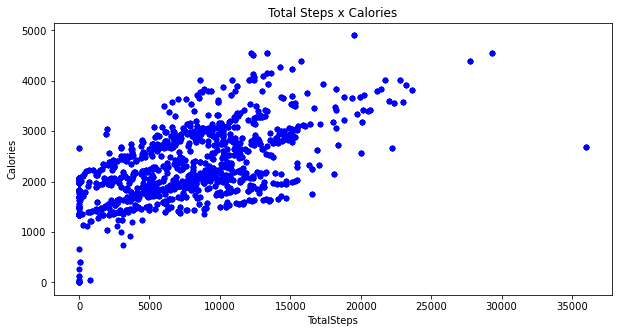

In [81]:
data_merged.plot.scatter(x='TotalSteps', y='Calories', color='blue', alpha=0.5, figsize=(10,5))
plt.title('Total Steps x Calories')
plt.show

As we can see on the scatter plot above, there is a positive relationship between two variables, which indicates that the greater number of steps taken, the more calories the users burn out.

### 5.2 Vizualizing the Average of Total Steps by the day of the week

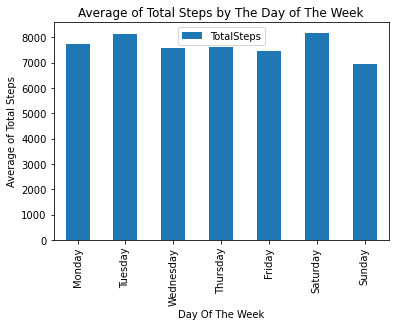

In [82]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day Of The Week', ylabel='Average of Total Steps', title ='Average of Total Steps by The Day of The Week', legend=True)
plt.show()

We can see the most active day in terms of steps taken on this graph is Saturday, followed by Tuesday. The least active day is Sunday - most likely a rest day for everyone.

### 5.3 Vizualizing the most active time of a day

<function matplotlib.pyplot.show(close=None, block=None)>

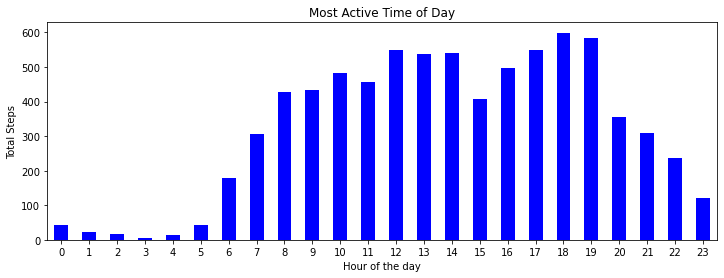

In [88]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='blue', title='Most Active Time of Day')
plt.xlabel('Hour of the day')
plt.ylabel('Total Steps')
plt.show

This chart tells us that the users tend to start becoming more active from 6 AM and less active from 11 PM. The level of activity doesnot change dramatically through out the day, but the peak hours seem to occur between 5 PM to 7 PM. Seem like it is the time of after school/work. 

The level of activity start decreasing significantly at 8 PM. The users seem to go to bed at that time.

### 5.4 Visualizing the Time of Day Users Burn the Most Calories


<function matplotlib.pyplot.show(close=None, block=None)>

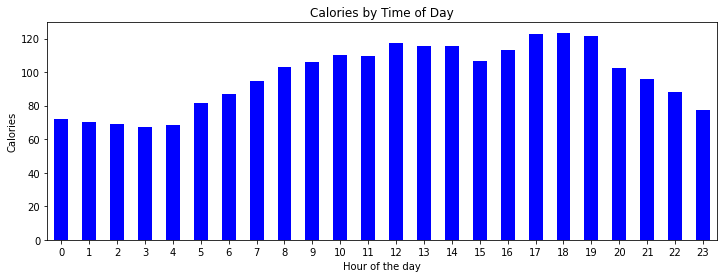

In [89]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='blue', title='Calories by Time of Day')
plt.xlabel('Hour of the day')
plt.ylabel('Calories')
plt.show

According to the [Sleep Foundation](https://www.sleepfoundation.org/how-sleep-works/how-your-body-uses-calories-while-you-sleep#:~:text=As%20a%20very%20approximate%20number,metabolic%20rate2%20(BMR), we burn around 50 calories an hour while we sleep. It is clear that Calories and Total Steps have the strong relationship with each other.

### 5.5 Visualizing the Average of Minutes Spent in Each Activity Category


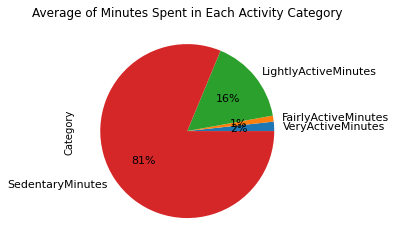

In [91]:
minutes_categories = data_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category', autopct='%1.0f%%', fontsize='11', startangle=0)
plt.show()

Users spend most of the time with Sedentary activity which can result in future health issues.

### 5.6 Visualizing Total Minutes Asleep x Total Time in Bed


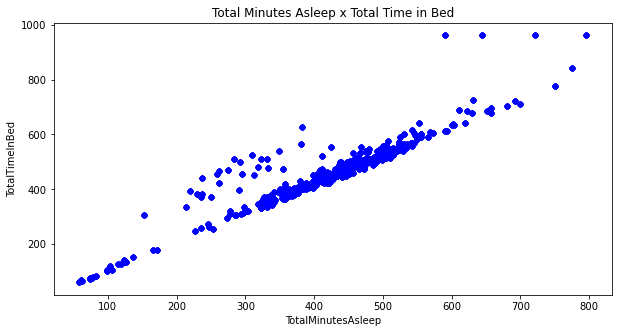

In [93]:
data_merged.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', color='blue', alpha=0.5, figsize=(10,5))
plt.title('Total Minutes Asleep x Total Time in Bed')
plt.show()

A strong positive linear association between the total number of minutes asleep and the total time spent in bed. However, we can still see that, at times, they do spend a larger amount of time in bed without being asleep. This could be related to the weekends when many people choose to sleep in or relax.

### 5.7 Visualizing the Average of Minutes Asleep by Day of the Week


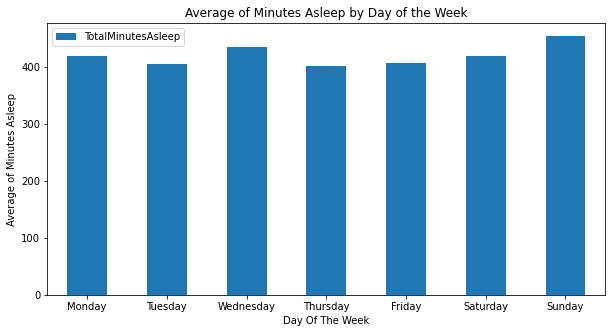

In [95]:
df_weekday['TotalMinutesAsleep'].plot.bar(xlabel='Day Of The Week', ylabel='Average of Minutes Asleep', title='Average of Minutes Asleep by Day of the Week', legend=True, rot=0, figsize=(10,5))
plt.show()

It is clear from this visualization that there are no significant changes in sleeping time throughout the week. This information shows us that the users have a consistent sleeping schedule.

The average time of sleep goes higher on Sunday where the users seem to take rest.

### 5.8 Visualizing Awake Time in Bed by Day of the Week


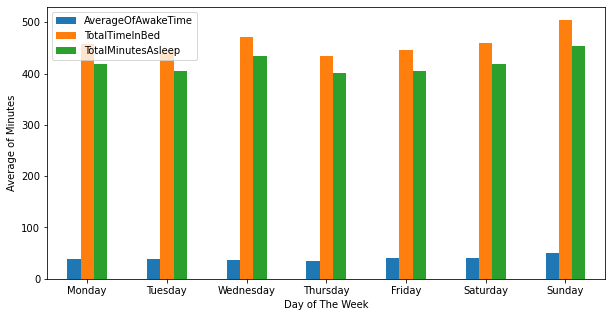

In [97]:
total_sleep.plot.bar(xlabel='Day of The Week', ylabel = 'Average of Minutes', rot=0, figsize=(10,5))
plt.show()

The users are very consistent with their time in bed throughout the days of the week. The longest recorded times occurred on the weekend, which is perfectly understandable.

# 6. ACT

In the final step, we will be delivering our insights and providing recommendations based on our analysis.

Here, we revisit our business questions and share with you our high-level business recommendations.

### 6.1. What are the trends identified?

The average user takes 7,638 steps and burns 2,304 calories per day.

There is a positive relationship between the total number of steps and the total number of burned calories.

The users seem to be consistent with their total steps scores throughout the week. The most active day is Saturday, and the least active is Sunday.

The users start their day between 6 am and 8 am. They are most active between 5 pm and 7 pm, and become less active at 8 pm.
Although the average user is very active for over 30 minutes every day, they still spend 81% of their time being sedentary.

There is a strong, positive relationship between the total number of minutes asleep and the total time spent in bed, with users only spending an average of 39.5 minutes of their total time in bed being awake.

The users have a consistent sleeping schedule, with an average sleeping time of 419.8 minutes (or 7 hours) per night - with Sunday (7.6 hours) being the day where the users seem to have slept the most.

Recording the lowest number of steps and the highest number of minutes asleep, Sunday is likely a rest day chosen by the users.

### 6.2. How could these trends apply to Bellabeat customers?**

Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can be very useful in applying to Bellabeat customers.

### 6.3. How could these trends help influence Bellabeat marketing strategy?**

**Personalized Notifications to Promote Activity:** The users' average of total steps is 7,638 – a mark well below the 10,000 daily steps recommended by the CDC. In addition, our analysis has shown that the average user spent about 81% of their day being sedentary. Bellabeat could incorporate personalized notifications on its app to motivate users to keep moving throughout the day. Such notifications could include real-time information regarding the number of steps taken so far, or even the number of steps left in order to reach the daily goal.

**Dynamic Calorie Counter:** The app could also provide the user with an elegantly designed, easy-to-use interface that displays the number of calories that are being burned throughout the day to improve motivation. The user could also have the option to set their customized daily calories goal and be able to follow their progress throughout the day.

**Market the Bellabeat Leaf as being comfortable even when you’re sleeping:** Though more data is necessary to say for sure, it’s possible that sleep data is less frequently recorded because wearing a watch in bed can be uncomfortable. Showcasing the Bellabeat Leaf’s comfortability might inspire users to wear theirs at night and collect more data on their sleeping habits. Besides that, The app could add more features to record sleep quality, the number of times one wakes up during the night, the total amount of awake time in bed, anxiety, and/or stress levels.

**Promote weight positivity so users feel encouraged and comfortable inputting their weight often.** Users seem did not want to input their weight into the devices so a culture of body positivity might empower Bellabeat customers to feel safe inputting their weight into a database. Regardless of if users want to lose, gain, or maintain their weight, they have to first know where they’re starting from.